## Brain figure generation
Create a mask, taking from reference the HardvardOxford ATLAS.

Define the current cluster we are drawing the number:

In [2]:
# cluster number
c = '3'

Define the results directory:

In [3]:
res_dir = '../results/test_poster/'

Create a mask for the selected cluster, representing the different probabilities over the corresponding region.

In [4]:
%matplotlib inline
import nibabel as nib
import numpy as np
import pandas as pd

# Load Atlas
subcortical_filename='atlases/HarvardOxford-sub-maxprob-thr25-1mm.nii.gz'
cortical_filename='atlases/HarvardOxford-cort-maxprob-thr25-1mm.nii.gz'
entorhinal_filename='atlases/Juelich-maxprob-thr25-1mm.nii.gz'

# Load files
nib_cort = nib.load(cortical_filename)
nib_cort_array = np.array(nib_cort.dataobj)

nib_subcort = nib.load(subcortical_filename)
nib_subcort_array = np.array(nib_subcort.dataobj)

nib_entorhinal = nib.load(entorhinal_filename)
nib_entorhinal_array = np.array(nib_entorhinal.dataobj)

# Load probabilities
df_prob = pd.read_csv(res_dir + 'results_scores_univ.csv', index_col=0)

# Create probability mask on regions
roi_labels_cort = {
    'LMIDTEMP': [10, 11, 12],
    'RMIDTEMP': [10, 11, 12],
    'LINFTEMP': [13, 14, 15],
    'RINFTEMP': [13, 14, 15],
    'LFUSIFORM': [36,37,38,39],
    'RFUSIFORM': [36,37,38,39],
}

roi_labels_subcort = {
    'LHIPPOC': [8],
    'RHIPPOC': [18],
    'LINFLATVEN': [2],
    'RINFLATVEN': [13],
    'VENTRICLES': [2,13]
}

roi_labels_entorhinal = {
    'LENTORHIN': [18],
    'RENTORHIN': [19]
}

mask = np.zeros((nib_cort_array.shape[0], nib_cort_array.shape[1], nib_cort_array.shape[2]))

# Cortical
for k, l in roi_labels_cort.items():
    for i in l:
        aux = df_prob.loc[k,c]
        mask[nib_cort_array==i+1] = aux

# Subcortical
for k, l in roi_labels_subcort.items():
    for i in l:
        aux = df_prob.loc[k,c]
        mask[nib_subcort_array==i+1] = aux

# Entorhinal
for k, l in roi_labels_entorhinal.items():
    for i in l:
        aux = df_prob.loc[k,c]
        mask[nib_entorhinal_array==i+1] = aux

new_image_mri = nib.Nifti1Image(mask, nib_cort.affine)

# Convert to nifty and save
nib.save(new_image_mri,'atlases/mask.nii.gz')

Generate the figure:

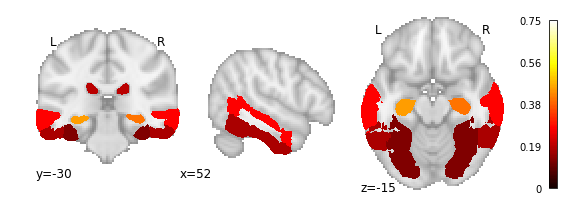

In [5]:
from nilearn import plotting

plotting.plot_stat_map('atlases/mask.nii.gz', bg_img='atlases/avg152T1_brain.nii.gz', vmax=0.75, annotate=True, black_bg=False, draw_cross=False, cut_coords=(52,-30,-15))
plotting.show()